<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento
`Fecha de entrega: Noviembre 21, 2020 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [1]:
import pandas as pd
transmi = pd.read_csv("tweets.csv")
transmi.head()

,Unnamed: 0,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions
0,0,@idubogota @TransMilenio @Bogota No olviden qu...,2020-11-16 23:51:36,Bogotá,Bogota,1328485906932764674,https://twitter.com/i/web/status/1328485906932...,No olviden que para mejorar más deben sacar...,[],[],"['@idubogota', '@TransMilenio', '@Bogota']"
1,1,Esta semana entrarán en operación 13 de los 48...,2020-11-16 23:00:00,Bogotá,"Bogotá, Colombia",1328472919475941379,https://twitter.com/i/web/status/1328472919475...,Esta semana entrarán en operación 13 de los 48...,['https://t.co/W6MTx2AkyC'],[],[]
2,2,#AntesyDespués \n\nEl puente peatonal de la Au...,2020-11-16 23:00:00,Bogotá,"Bogotá, Colombia",1328472918909734917,https://twitter.com/i/web/status/1328472918909...,\n\nEl puente peatonal de la Autopista Norte ...,['https://t.co/sa1Rx0SujR'],"['#AntesyDespués', '#SomosIDU']","['@TransMilenio', '@Bogota!🌳']"
3,3,Con la cantidad de edificios altos que se está...,2020-11-16 22:20:24,Bogotá,"Bogotá, Colombia",1328462955235725315,https://twitter.com/i/web/status/1328462955235...,Con la cantidad de edificios altos que se está...,[],[],[]
4,4,@petrogustavo Menos mal ud no tiene nada que v...,2020-11-16 22:20:20,Bogotá,NaN,1328462936675848193,https://twitter.com/i/web/status/1328462936675...,Menos mal ud no tiene nada que ver con nada p...,[],[],"['@petrogustavo', '@incitaradelinquir']"


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator

In [3]:
translator = Translator()
transmi['trad'] = transmi['clean'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))

In [4]:
transmi['ingles'] = transmi['trad'].apply(lambda valor: valor.text)

In [5]:
vader = SentimentIntensityAnalyzer()
transmi['sentimiento'] = transmi['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])

In [6]:
transmi_sentiemiento = transmi[['clean', 'sentimiento']].sort_values('sentimiento')
transmi_sentiemiento 

,clean,sentimiento
41,🤨... por la ventana??!!!?...🤯... En el techo?...,-0.9727
196,Esto es lo que la señora Alcaldesa cuida a su...,-0.9019
83,"Hace mucho rato no monto bicicleta,yo no puedo...",-0.8990
137,Para gastar millones de pesos de impue...,-0.8885
25,"Por las ventanas de los buses, delincuentes ro...",-0.8625
...,...,...
178,"que procede, ahora de atracador en Transmile...",0.8481
97,Favor instruir al respecto a la gente de que...,0.8481
106,Revive el especial de seguridad en de y cono...,0.8807
177,Cada paso que damos en Terpel es una huella...,0.9377


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [7]:
negativo =  transmi_sentiemiento.loc[transmi_sentiemiento["sentimiento"].idxmin()]
print(f"El tweet más negativo fue: {negativo.clean}")
print(f"con un score de: {negativo.sentimiento}")

El tweet más negativo fue:  🤨... por la ventana??!!!?...🤯... En el techo??!!!!...😧... Pero es que les falta un cerebro o que!!!!!😱😱... Alguien que los encarcele y los pongan a trabajar de algo!!!!😡😡  
con un score de: -0.9727


In [8]:
positivo =  transmi_sentiemiento.loc[transmi_sentiemiento["sentimiento"].idxmax()]
print(f"El tweet más poisitivo fue: {positivo.clean}")
print(f"Con un score de: {positivo.sentimiento}")

El tweet más poisitivo fue: ¡HOY APERTURA DE  2020! Estaremos en   a las 4:00pm en vivo. Tripleta de  Colombia, México y Paraguay unidos en un solo corazón. Cecilia Roth dará apertura al festival más importante de la región. ¡Imperdible! 
Con un score de: 0.9428


###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [9]:
transmi_sentiemiento['resultado'] = " "
transmi_sentiemiento.loc[transmi_sentiemiento['sentimiento']>0, 'resultado'] = 'Positivo'
transmi_sentiemiento.loc[transmi_sentiemiento['sentimiento']<0, 'resultado'] = 'Negativo'
transmi_sentiemiento.loc[transmi_sentiemiento['sentimiento']==0, 'resultado'] = 'Neutro'
transmi_sentiemiento

,clean,sentimiento,resultado
41,🤨... por la ventana??!!!?...🤯... En el techo?...,-0.9727,Negativo
196,Esto es lo que la señora Alcaldesa cuida a su...,-0.9019,Negativo
83,"Hace mucho rato no monto bicicleta,yo no puedo...",-0.8990,Negativo
137,Para gastar millones de pesos de impue...,-0.8885,Negativo
25,"Por las ventanas de los buses, delincuentes ro...",-0.8625,Negativo
...,...,...,...
178,"que procede, ahora de atracador en Transmile...",0.8481,Positivo
97,Favor instruir al respecto a la gente de que...,0.8481,Positivo
106,Revive el especial de seguridad en de y cono...,0.8807,Positivo
177,Cada paso que damos en Terpel es una huella...,0.9377,Positivo


In [10]:
transmi_sentimientos = pd.DataFrame(transmi_sentiemiento.resultado.value_counts()).reset_index()
transmi_sentimientos.columns = ['sentimiento', 'resultado']
transmi_sentimientos

,sentimiento,resultado
0,Positivo,79
1,Negativo,76
2,Neutro,45


[BONUS 5pts] : Diagrama de barras de la pregunta 3

In [11]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt


%matplotlib inline
init_notebook_mode(connected=True)

trace = go.Bar(x=transmi_sentimientos.sentimiento.values,
               y=transmi_sentimientos.resultado.values)

layout = go.Layout(title='Conteo de Tweets sobre Tramsmilenio según sentimientos')

fig = go.Figure(data = [trace], layout=layout)
iplot(fig)


[BONUS 7pts] : Nubes de palabras por sentimiento¶

In [12]:
transmi_sentiemiento

,clean,sentimiento,resultado
41,🤨... por la ventana??!!!?...🤯... En el techo?...,-0.9727,Negativo
196,Esto es lo que la señora Alcaldesa cuida a su...,-0.9019,Negativo
83,"Hace mucho rato no monto bicicleta,yo no puedo...",-0.8990,Negativo
137,Para gastar millones de pesos de impue...,-0.8885,Negativo
25,"Por las ventanas de los buses, delincuentes ro...",-0.8625,Negativo
...,...,...,...
178,"que procede, ahora de atracador en Transmile...",0.8481,Positivo
97,Favor instruir al respecto a la gente de que...,0.8481,Positivo
106,Revive el especial de seguridad en de y cono...,0.8807,Positivo
177,Cada paso que damos en Terpel es una huella...,0.9377,Positivo


In [13]:
import re
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish') 

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto
transmi_sentiemiento['palabras'] = transmi_sentiemiento['clean'].apply(lambda texto: pre_procesado(texto))
transmi_sentiemiento


,clean,sentimiento,resultado,palabras
41,🤨... por la ventana??!!!?...🤯... En el techo?...,-0.9727,Negativo,ventana techo falta cerebro alguien encarcele ...
196,Esto es lo que la señora Alcaldesa cuida a su...,-0.9019,Negativo,señora alcaldesa cuida ciudadanos pobres vulne...
83,"Hace mucho rato no monto bicicleta,yo no puedo...",-0.8990,Negativo,hace rato monto bicicleta puedo pagar carro dí...
137,Para gastar millones de pesos de impue...,-0.8885,Negativo,gastar millones pesos impuestos crear infraest...
25,"Por las ventanas de los buses, delincuentes ro...",-0.8625,Negativo,ventanas buses delincuentes roban celulares us...
...,...,...,...,...
178,"que procede, ahora de atracador en Transmile...",0.8481,Positivo,procede ahora atracador transmilenio
97,Favor instruir al respecto a la gente de que...,0.8481,Positivo,favor instruir respecto gente permite decenas ...
106,Revive el especial de seguridad en de y cono...,0.8807,Positivo,revive especial seguridad conoce medidas espec...
177,Cada paso que damos en Terpel es una huella...,0.9377,Positivo,cada paso damos terpel huella nueva dejamos cr...


In [14]:
positivos = transmi_sentiemiento.loc[transmi_sentiemiento.resultado == 'Positivo', ['resultado', 'palabras']]
negativos = transmi_sentiemiento.loc[transmi_sentiemiento.resultado == 'Negativo', ['resultado', 'palabras']]
neutro = transmi_sentiemiento.loc[transmi_sentiemiento.resultado == 'Neutro', ['resultado', 'palabras']]

In [15]:
#Cargue Librerías#

import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from IPython.display import display

### Sentiemientos Positivos

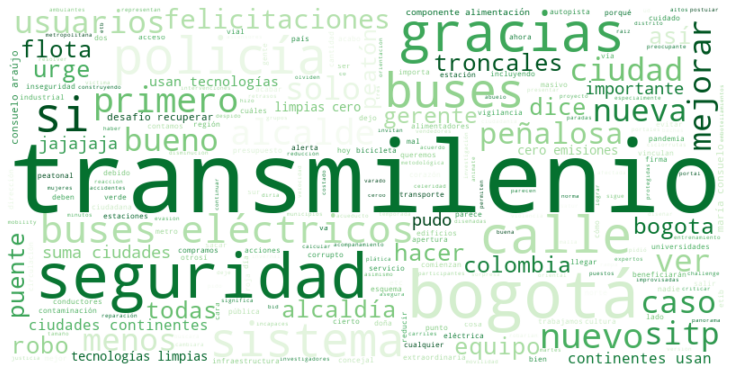

In [16]:
palabras = positivos.palabras.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='Greens').generate(palabras) 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Sentiemientos Negativos

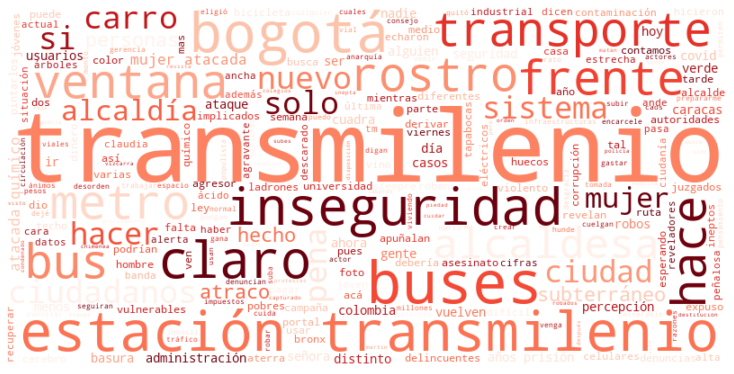

In [17]:
palabras = negativos.palabras.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='Reds').generate(palabras) 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Sentiemientos Neutros

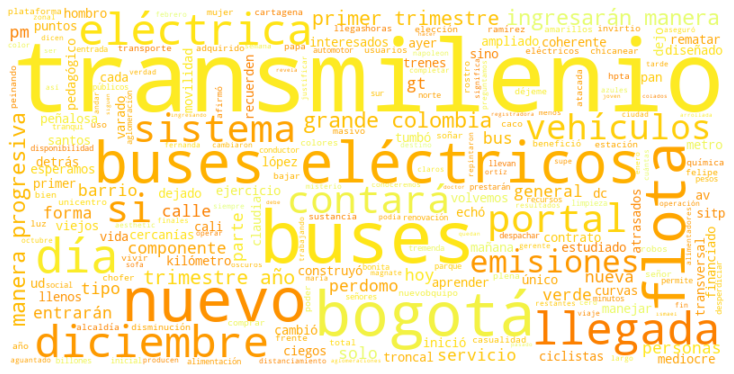

In [18]:
palabras = neutro.palabras.str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='Wistia').generate(palabras) 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()